In [1]:
import  numpy              as np
import  pandas             as pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

import warnings
warnings.filterwarnings("ignore")

import pickle

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 1 - Intro

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  1. Read

In [2]:
train = pd.read_csv ('data_train.csv')

test  = pd.read_csv ('data_test.csv')

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
data_info  = pd.read_csv ('data_dict.csv' , index_col='Column')
data_info

,Description
Column,
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility


In [5]:
print ( train.shape )
print ( test.shape  )

(318438, 18)
(137057, 17)


<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  2. Col info

In [6]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [7]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

<span style="font-family: Garamond;  font-weight:bold;  font-size:1.6em;   color:green">  Inf
* Admission_Deposit , Visitors_with_patient, Available_Extra_Rooms are of continuous type.
* Rest of the features are of categorical type. 

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  3. Data Mods

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  i. Stay

In [8]:
train['Stay']  .unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [9]:
train['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  ii. Age

In [10]:
train['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [11]:
train['UB_Age']  =  train['Age'] .str.split  ('-', expand = True)  [1]  .astype(int)
test['UB_Age']   =  test['Age'] .str.split  ('-', expand = True)   [1]  .astype(int)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  iii. IDs

In [12]:
train.drop (['case_id','patientid'] , axis=1 , inplace=True)
test.drop  (['case_id','patientid'] , axis=1 , inplace=True)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 2 - EDA

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  1. Univariate Analysis

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  i. For Categorical Features

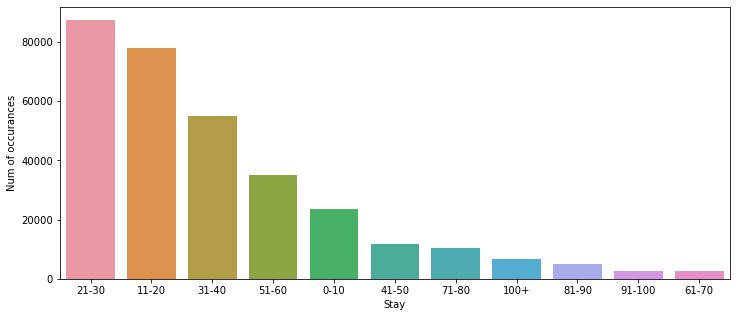

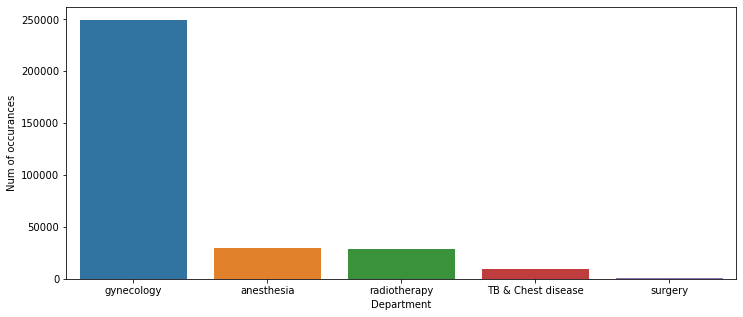

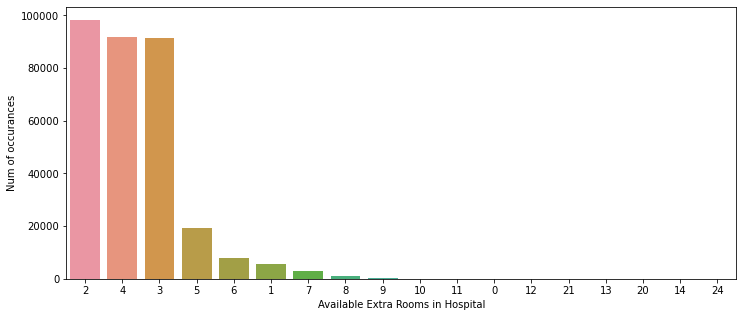

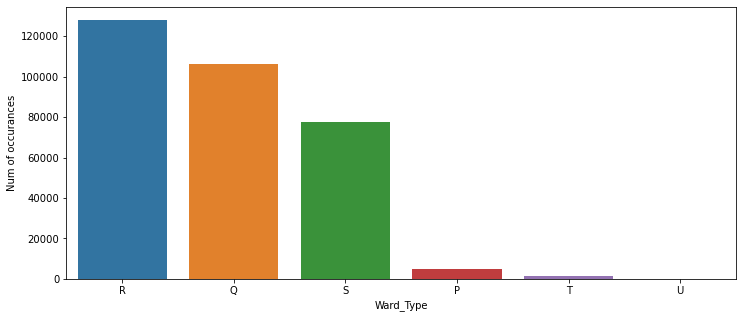

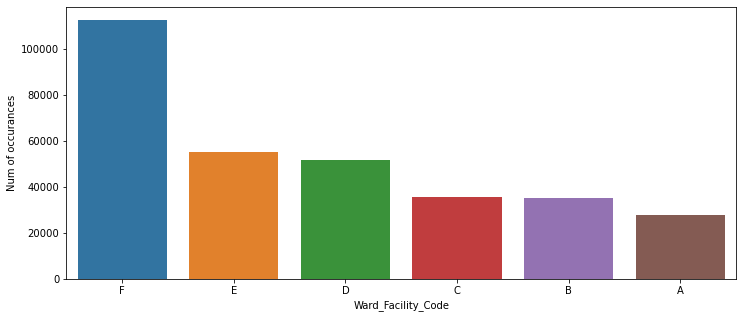

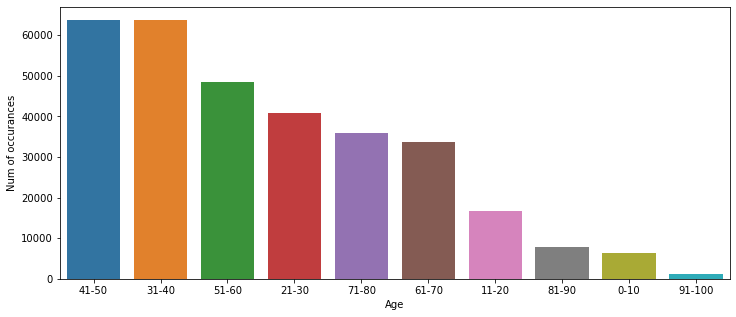

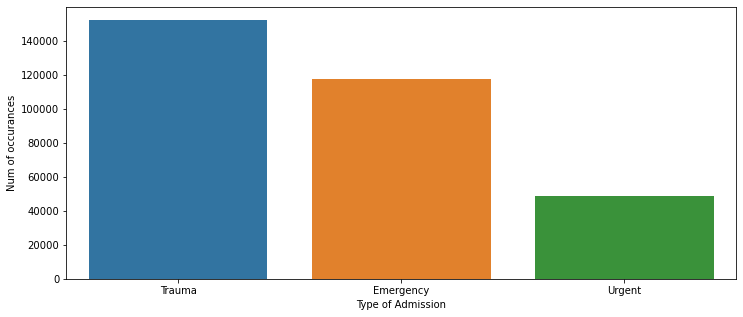

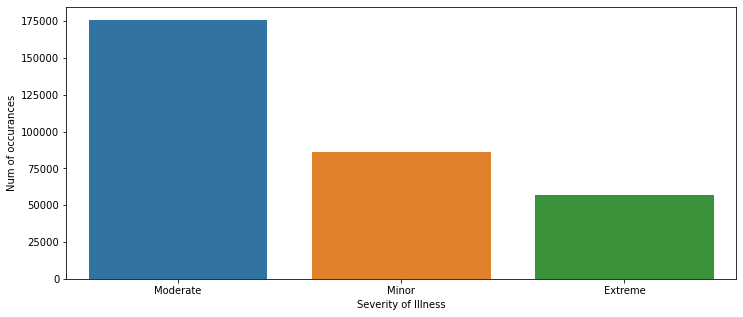

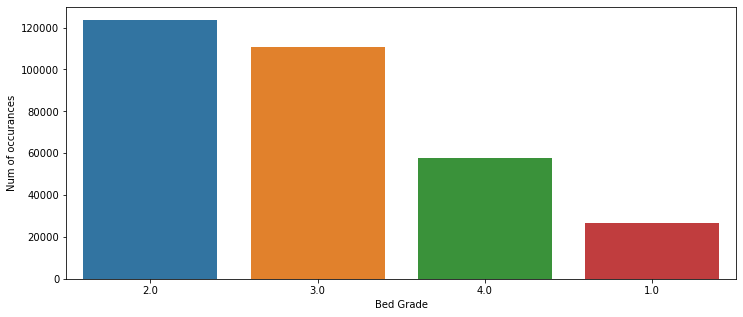

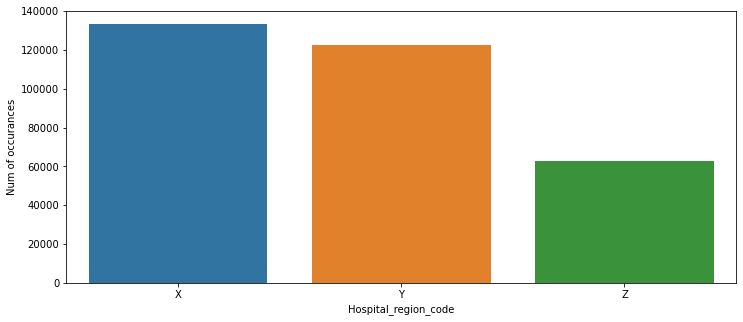

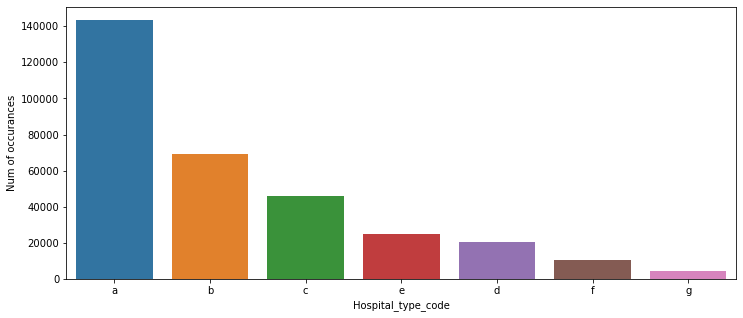

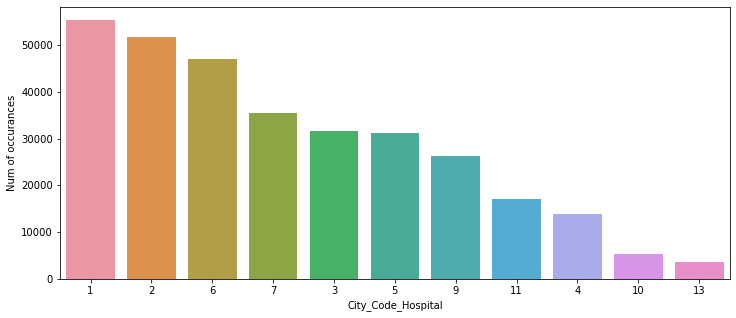

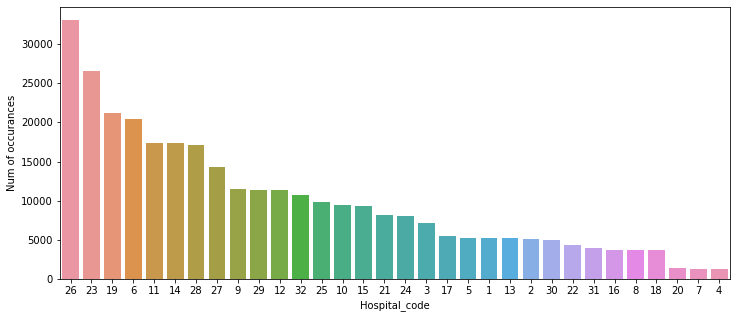

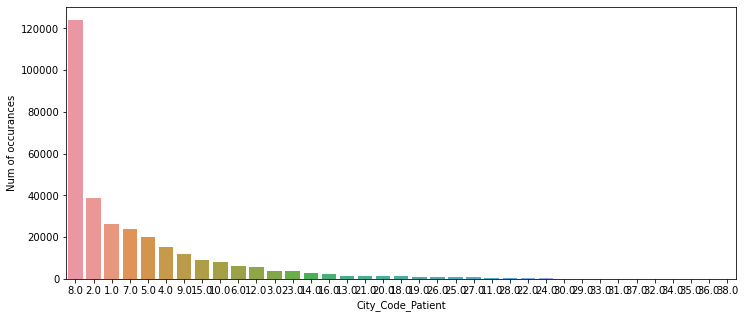

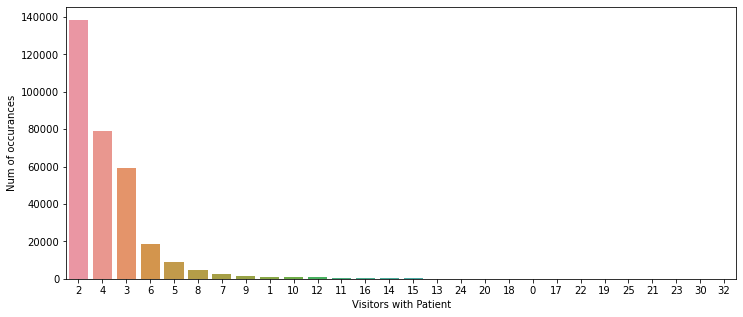

In [13]:
for i in [ 'Stay'               ,  'Department'         , 'Available Extra Rooms in Hospital'    , 'Ward_Type'          , 'Ward_Facility_Code'    ,  
           'Age'                ,  'Type of Admission'  , 'Severity of Illness'                  , 'Bed Grade'          , 'Hospital_region_code'  , 
           'Hospital_type_code' ,  'City_Code_Hospital' , 'Hospital_code'                        , 'City_Code_Patient'  , 'Visitors with Patient'  ]:
    
    vc = train[i].value_counts()

    plt.figure(figsize=(12,5))
    
    sns.barplot(x =vc.index.values, y =vc.values, order =vc.index)
    
    plt.xlabel(i)
    plt.ylabel('Num of occurances')

* Data is imbalanced. 
* Example :
    * Data related patients with the stay for more than 60 days is only about 10% of the overall data and for stay less than 40 days is almost 80% of the total data. 
    * most of the patients were admitted in gynecology department.
    * in general 2-4 rooms were available.
    * 97% of the total patients were admitted in 'R', 'S' and 'Q' type of ward.
    * 90% of the patients had age between 31-60 years.

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  ii. For Numeric Feature

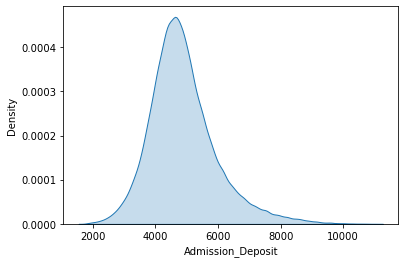

In [14]:
sns.kdeplot ( train['Admission_Deposit'] , shade=True );

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  2. Bivariate Analysis

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  i. Categorical Cols

In [15]:
sequence = [ '0-10' , '11-20' , '21-30' , '31-40' , '41-50' , '51-60' , '61-70' , '71-80' , '81-90' , '91-100' , '100+']

* all features ...... excluding ..... caseid, patientid, admission

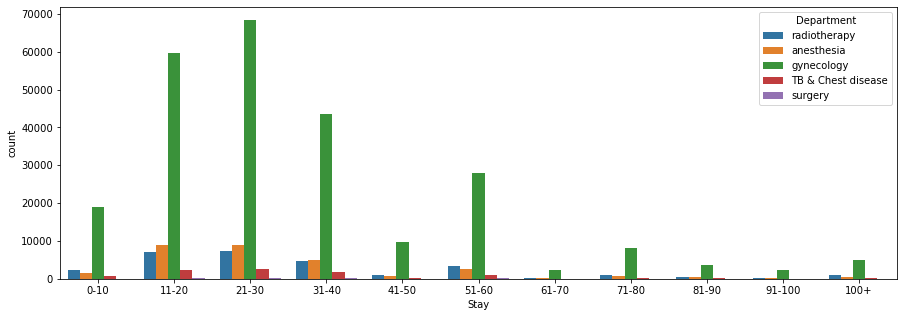

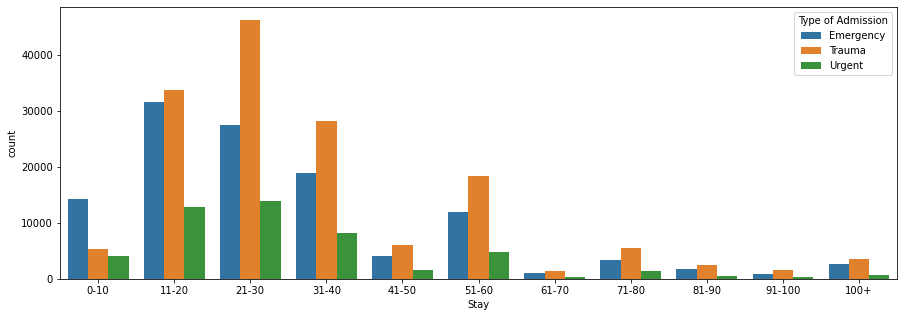

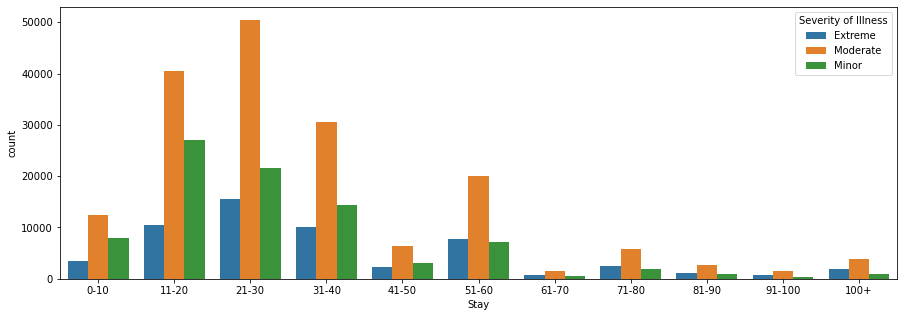

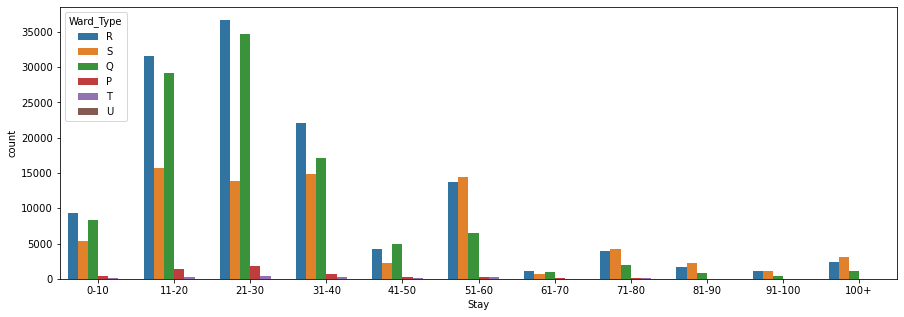

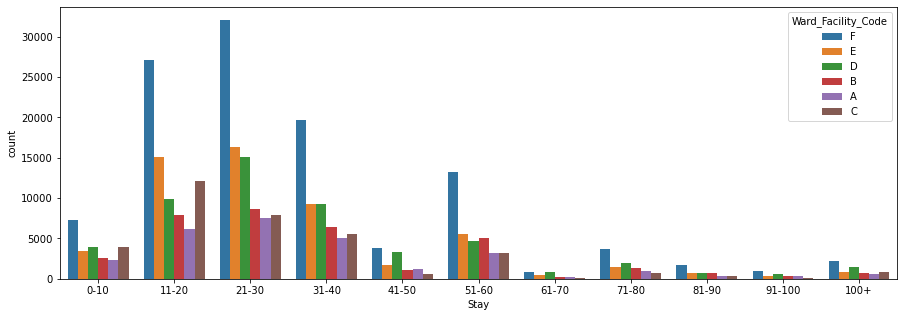

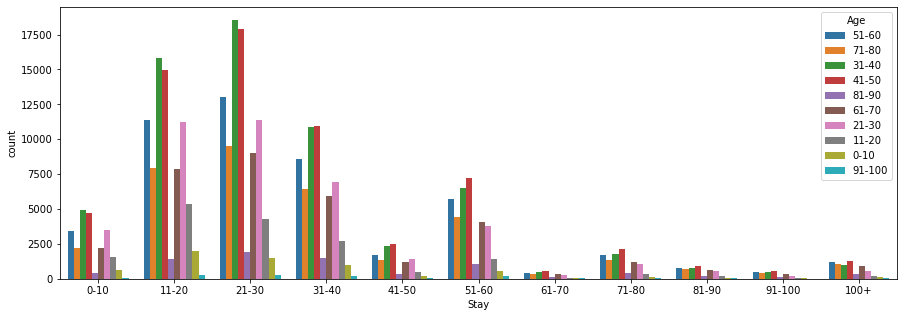

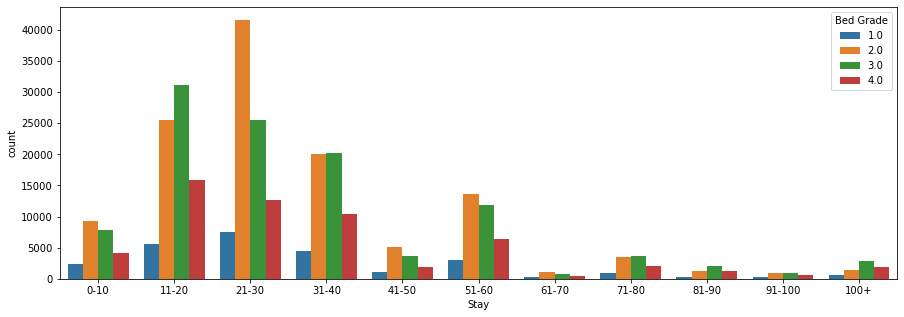

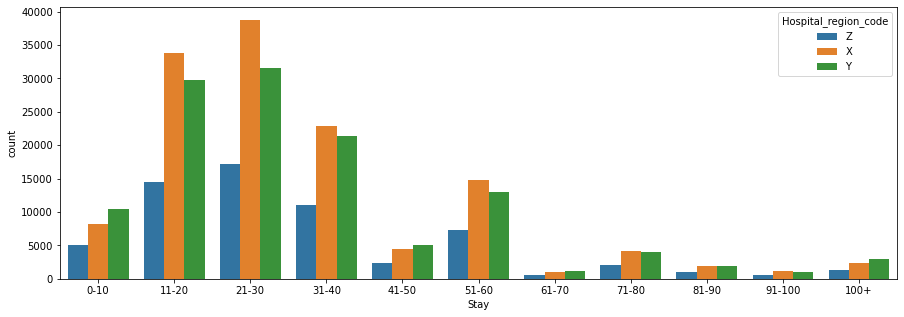

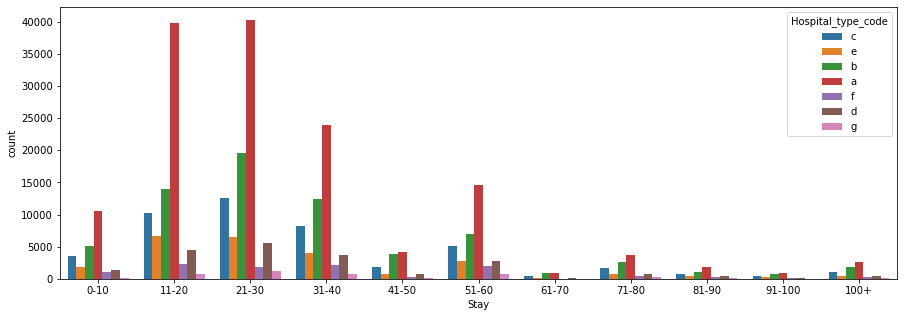

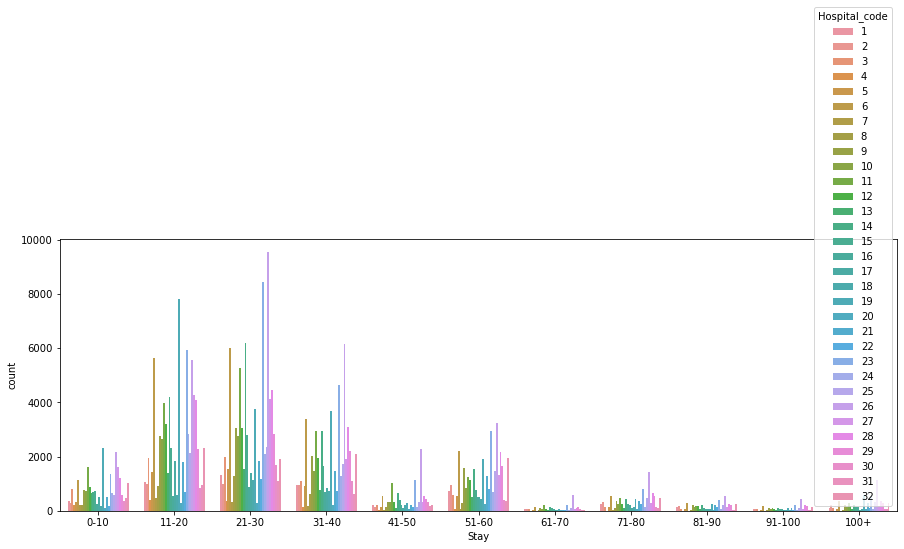

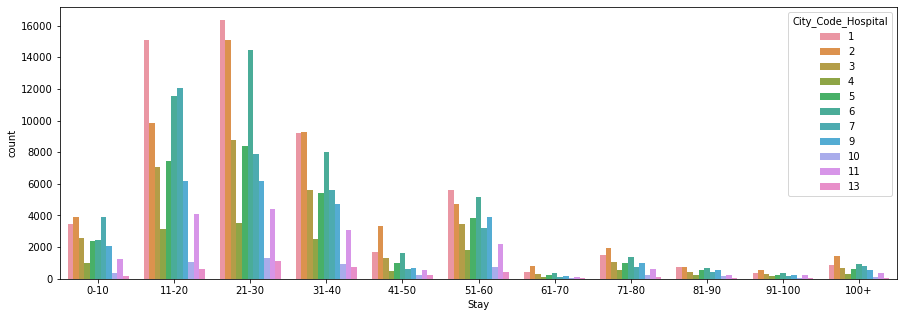

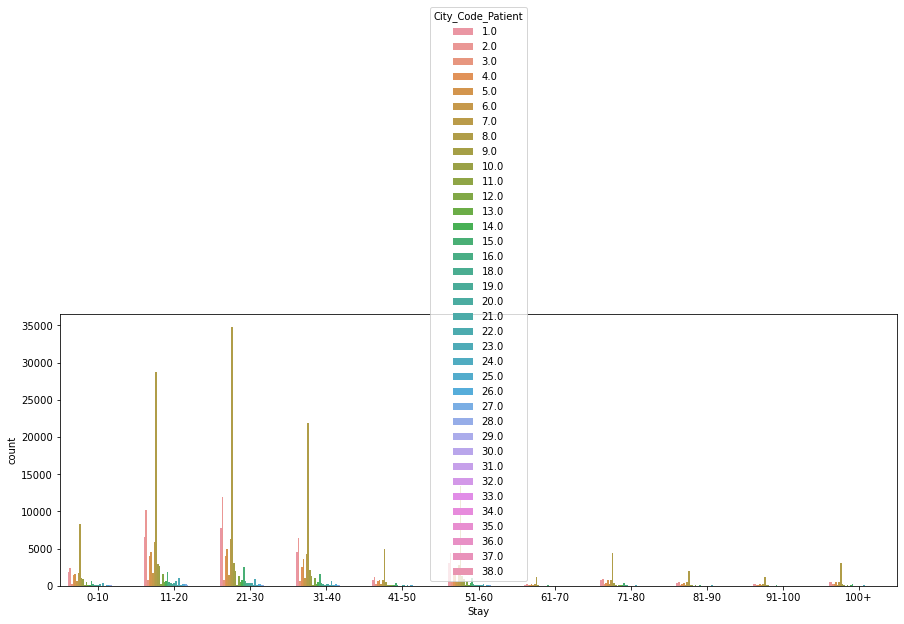

In [16]:
for i in [ 'Department'         ,   'Type of Admission'     , 'Severity of Illness'   ,  'Ward_Type'  , 'Ward_Facility_Code' ,  
           'Age'                ,   'Bed Grade'             , 'Hospital_region_code'  ,  'Hospital_type_code'                , 
           'Hospital_code'      ,   'City_Code_Hospital'    , 'City_Code_Patient'    ]:
    
    plt.figure (figsize=(15,5))

    sns.countplot (x ="Stay", hue =i, data =train, order =sequence);

* Hospital_code , City_Code_Hospital , City_Code_Patient contain lot of components

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:orange">  ii. For Numeric Cols

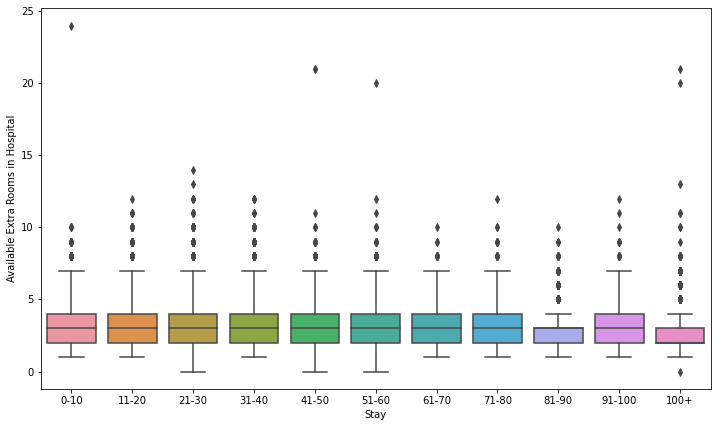

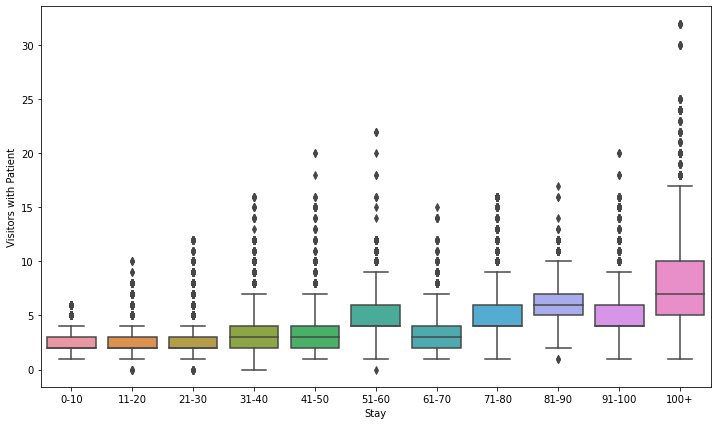

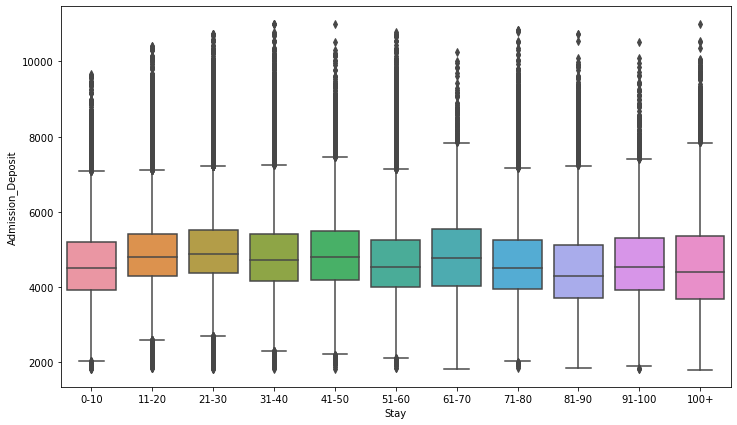

In [17]:
for i in ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']:
    
    plt.figure(figsize=(12,7))

    sns.boxplot ( x='Stay', y=i, order =sequence , data =train ) ;

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 3 - NaN 

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  1. Checking

In [18]:
print ( 'NAN % on train data :\n',   np.round  (  train.isnull().sum() * 100   /  len(train)  ,   2 )      )
print ( '\n')
print ( 'NAN % on test data  :\n',   np.round  (  test.isnull().sum() * 100   /   len(test)   ,   2 )      )

NAN % on train data :
 Hospital_code                        0.00
Hospital_type_code                   0.00
City_Code_Hospital                   0.00
Hospital_region_code                 0.00
Available Extra Rooms in Hospital    0.00
Department                           0.00
Ward_Type                            0.00
Ward_Facility_Code                   0.00
Bed Grade                            0.04
City_Code_Patient                    1.42
Type of Admission                    0.00
Severity of Illness                  0.00
Visitors with Patient                0.00
Age                                  0.00
Admission_Deposit                    0.00
Stay                                 0.00
UB_Age                               0.00
dtype: float64


NAN % on test data  :
 Hospital_code                        0.00
Hospital_type_code                   0.00
City_Code_Hospital                   0.00
Hospital_region_code                 0.00
Available Extra Rooms in Hospital    0.00
Department   

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  2. Treatment

In [19]:
train.dropna  (subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

test['Bed Grade']         .fillna  ( train['Bed Grade']          .mode()[0]  , inplace = True )
test['City_Code_Patient'] .fillna  ( train['City_Code_Patient']  .mode()[0]  , inplace = True )

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 4 - Outlier

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:blue">  1. Checking for Num Cols

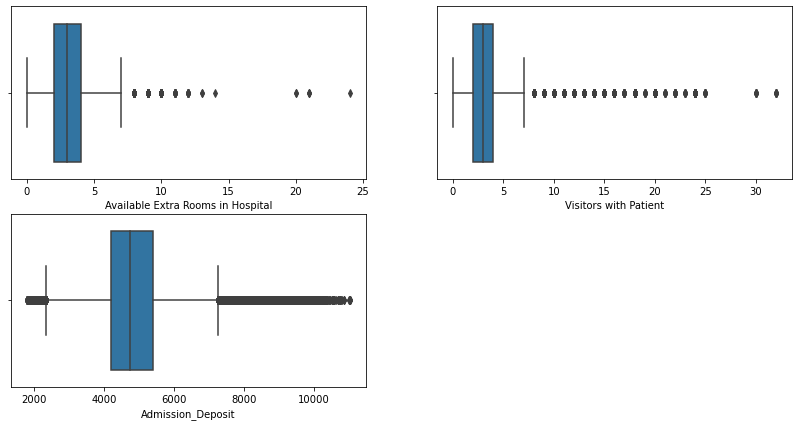

In [20]:
fig, ax = plt.subplots (2,2, figsize = (14,7))

sns.boxplot ( ax = ax[0, 0] , x = train['Available Extra Rooms in Hospital'])
sns.boxplot ( ax = ax[0, 1] , x = train['Visitors with Patient'])
sns.boxplot ( ax = ax[1, 0] , x = train['Admission_Deposit'])

fig.delaxes(ax[1,1])

plt.show()

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 5 - Encoding 

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:blue">  1. Ordinal Data

In [21]:
admission_encode  = {'Trauma' : 1,  'Urgent'   : 2, 'Emergency' : 3 }
severity_encode   = {'Minor' :  1,  'Moderate' : 2, 'Extreme'   : 3 }


train ['Type of Admission']     =   train ['Type of Admission']   .map (admission_encode)
train ['Severity of Illness']   =   train ['Severity of Illness'] .map (severity_encode)


test ['Type of Admission']      =   test ['Type of Admission']    .map (admission_encode)
test ['Severity of Illness']    =   test ['Severity of Illness']  .map (severity_encode)

In [22]:
stay_encode = { '0-10':1 , '11-20':2 , '21-30':3 , '31-40':4 , '41-50':5 , '51-60':6 , '61-70':7 , '71-80':8 , '81-90':9 , '91-100': 10 , '100+':11 }

train ['Stay']  =   train ['Stay']  .map (stay_encode)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:blue">  2. Nominal Data

In [23]:
train = pd.get_dummies ( train, 
                      columns = ['Hospital_code' , 'Hospital_type_code' , 'City_Code_Hospital' , 'Hospital_region_code', 
                                 'Department'    , 'Ward_Type'          , 'Ward_Facility_Code' , 'City_Code_Patient'   ,  'Bed Grade']  ,
                      drop_first = True)


test = pd.get_dummies ( test, 
                      columns = ['Hospital_code' , 'Hospital_type_code' , 'City_Code_Hospital' , 'Hospital_region_code', 
                                 'Department'    , 'Ward_Type'          , 'Ward_Facility_Code' , 'City_Code_Patient'   ,  'Bed Grade']  ,
                      drop_first = True)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 6 - Scale Transform

As we are using Random Forest Classifier , so we dont have to scale transform the data

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 7 - Feature Selection

In [24]:
train.drop ( 'Age'  , axis=1 , inplace=True )
test.drop  ( 'Age'  , axis=1 , inplace=True )

In [25]:
x =  train.drop ( ['Stay'] , axis=1 )
y =  train ['Stay']

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit ( x , y )

RandomForestClassifier()

In [27]:
table  =  pd.DataFrame   (  data = { 'Features' : x.columns  , 'Importance ratio' : rf.feature_importances_.tolist() }    )

table.sort_values        (  by=['Importance ratio'] , ascending=False , inplace=True )

print (table.head(20))

                              Features  Importance ratio
4                    Admission_Deposit          0.287740
5                               UB_Age          0.131177
3                Visitors with Patient          0.112117
0    Available Extra Rooms in Hospital          0.077376
2                  Severity of Illness          0.041828
1                    Type of Admission          0.033765
75               City_Code_Patient_8.0          0.017596
56               Department_gynecology          0.016263
69               City_Code_Patient_2.0          0.013285
106                      Bed Grade_3.0          0.013039
74               City_Code_Patient_7.0          0.012281
105                      Bed Grade_2.0          0.012112
72               City_Code_Patient_5.0          0.011484
107                      Bed Grade_4.0          0.011115
57             Department_radiotherapy          0.011052
71               City_Code_Patient_4.0          0.009958
59                         Ward

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red"> Part 8 - Model Building

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:blue"> 1. Random Forest Classifier

In [51]:
from  sklearn.model_selection   import  train_test_split , KFold , RandomizedSearchCV
from  sklearn.ensemble          import  RandomForestClassifier
from  sklearn.metrics           import  accuracy_score

In [70]:
kf  =  KFold (shuffle=True, n_splits=10, random_state=0) 

rfc =  RandomForestClassifier ()

param = { 'n_estimators': np.arange(1,55)   ,  'criterion':['entropy','gini'] , 'max_depth':np.arange(1,20) , 'min_samples_leaf':np.arange(1,10) } 

RSCV  =  RandomizedSearchCV (rfc , param , cv=kf , scoring='f1_weighted')

RSCV.fit (x,y)

RSCV.best_params_

{'n_estimators': 53,
 'min_samples_leaf': 5,
 'max_depth': 17,
 'criterion': 'entropy'}

In [97]:
x_train , x_test , y_train , y_test  =   train_test_split ( x , y , test_size = 0.3 , random_state = 0 )

clf      =   RandomForestClassifier ( n_estimators=53 , criterion='entropy', max_depth=17 , min_samples_leaf=8 , max_features=.2 , random_state=0 )

clf.fit      ( x_train , y_train )

y_pred   =   clf.predict ( x_test )

score    =   accuracy_score ( y_pred , y_test )

print('Accuracy : ' , round(score*100,2) , ' %' )

Accuracy :  42.16  %


<span style="font-family: Garamond;  font-weight:bold;  font-size:2.8em;   color:red">  Part 9 - Submission

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:blue">  1. Fit the model into entire data

In [98]:
clf.fit ( x , y )

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=0.2,
                       min_samples_leaf=8, n_estimators=53, random_state=0)

In [31]:
ls          =  test.columns.tolist()

in_data     =  test [ls]

out_data    =  clf.predict (in_data)

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.2em;   color:blue">  2. Create submission file

In [32]:
test   =  pd.read_csv ('data_test.csv')
submit =  pd.DataFrame()

In [33]:
submit ['case_id']  =  test['case_id']
submit ['Stay']     =  out_data

stay_decode         =  {  1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70',8 : '71-80', 9 : '81-90', 
                         10 : '91-100', 11 : 'More than 100 Days' }

submit ['Stay']     =  submit ['Stay'].map(stay_decode)

submit.head(15)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,11-20
8,318447,21-30
9,318448,21-30


In [34]:
# submit.to_csv  ( 'File.csv' , index = False , header = True )

<span style="font-family: Garamond;  font-weight:bold;  font-size:2.4em;   color:red">  Part 10 : Deployment

In [99]:
pickle.dump ( clf , open ('Project.pkl','wb') )